In [1]:
#implementation and visualizing the data of our project
#importing the packages

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
#the dataset
df=pd.read_csv('Crop_recommendation.csv')

df.iloc[:,:]

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
#printing the initial data

df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [7]:
#we can find if there are any null values in the dataset

df.isnull().sum()
df1=df.head(20)


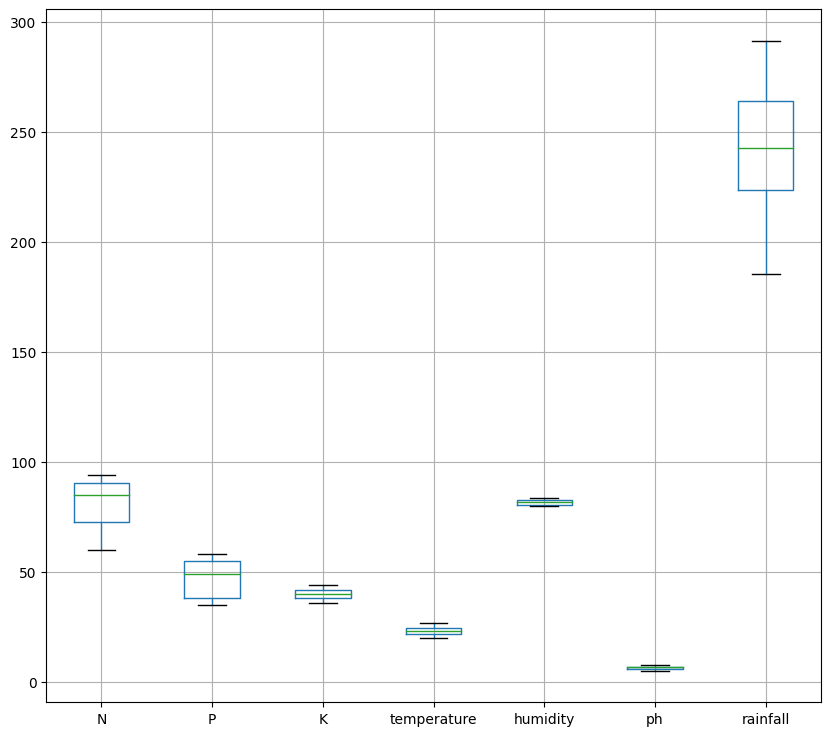

In [8]:
#data analysis using box plot

plt.figure(figsize=(10,9))
df1.boxplot()
plt.show()

In [9]:
#correlation

df.corr()

<ipython-input-9-8938fd4e927e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


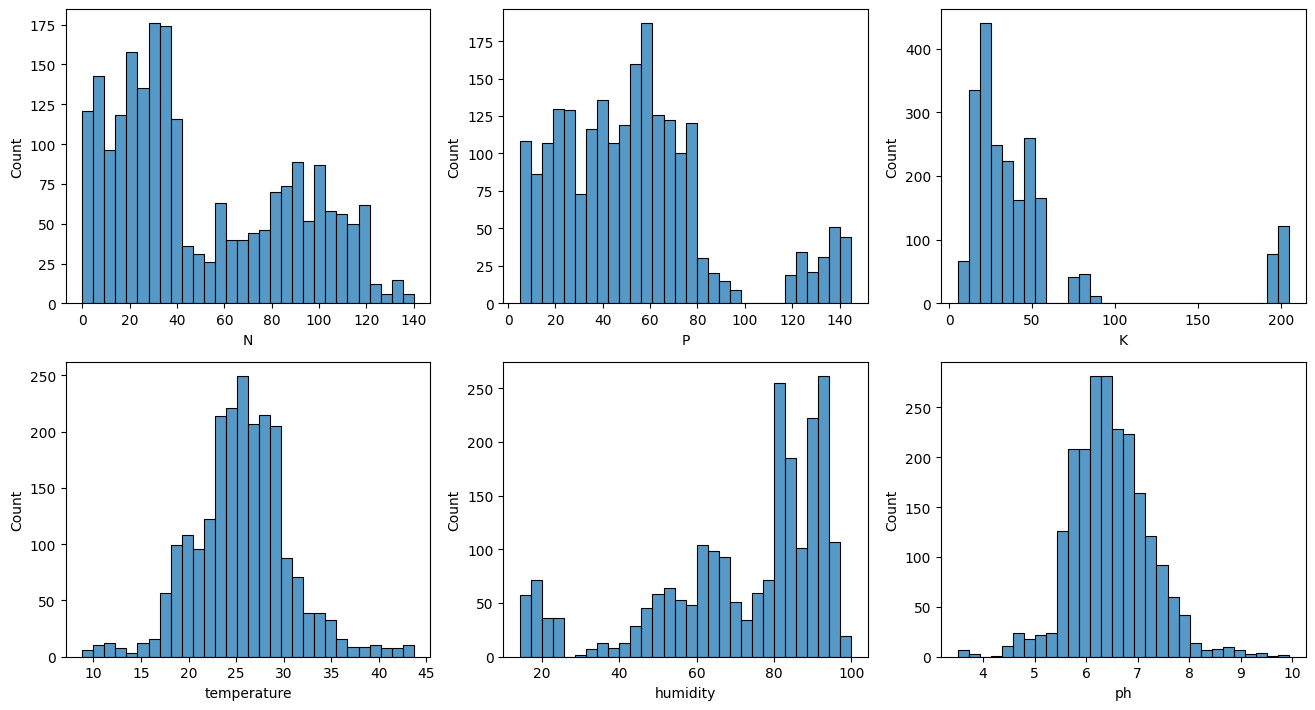

<Axes: xlabel='rainfall', ylabel='Count'>

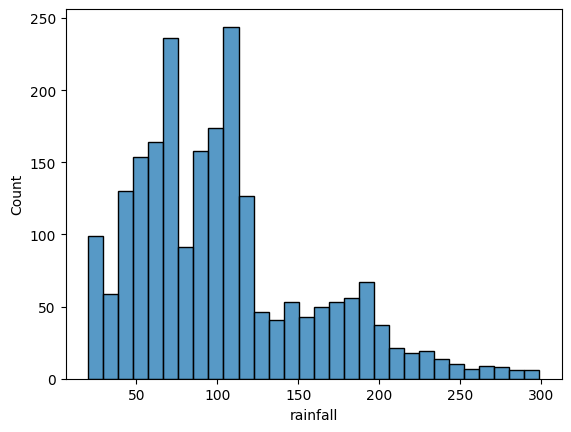

In [14]:
columns=df.columns[:-1]
plt.figure(figsize=(16,13))
i=1
for col in columns[:-1]:
  plt.subplot(3,3,i)
  sns.histplot(df[col],bins=30)
  i+=1
plt.show()
sns.histplot(df[columns[-1]],bins=30)

<Axes: ylabel='Count'>

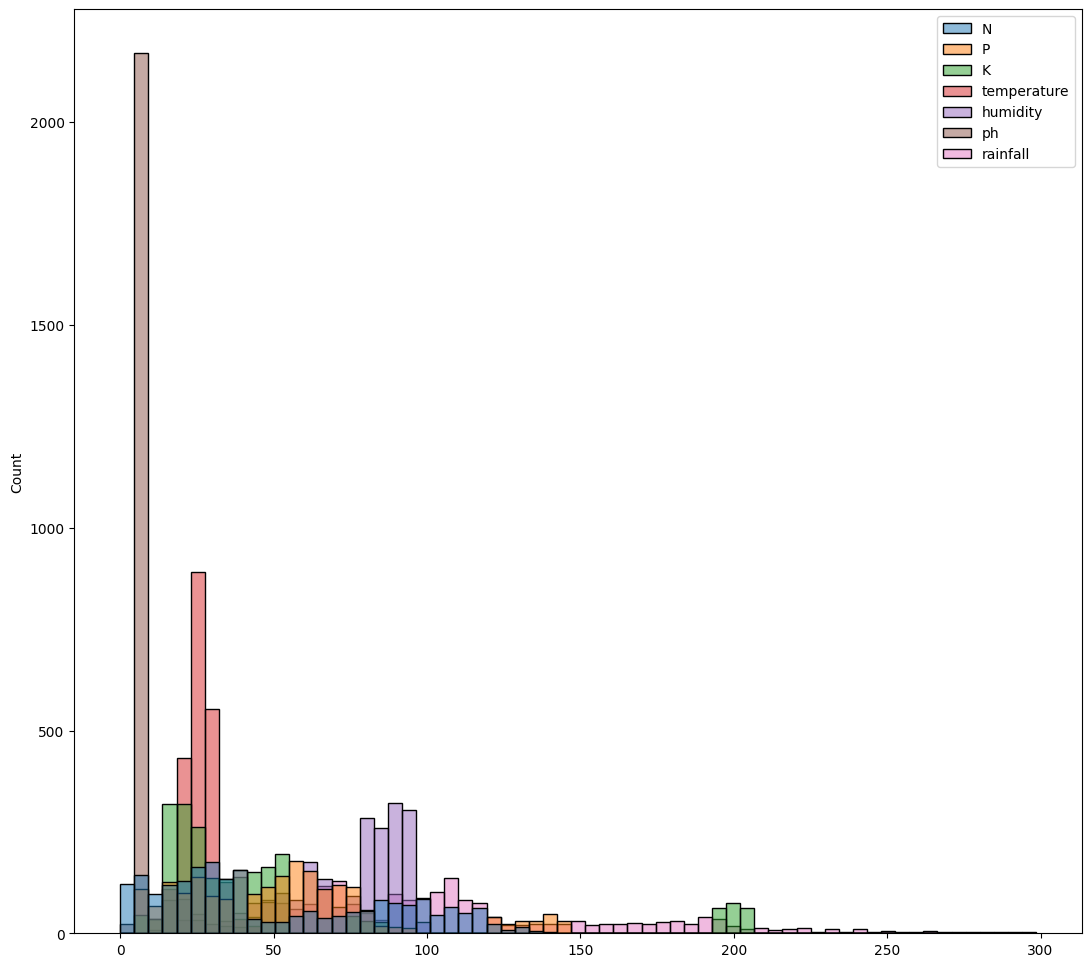

In [15]:
plt.figure(figsize=(13,12))
sns.histplot(df[columns])

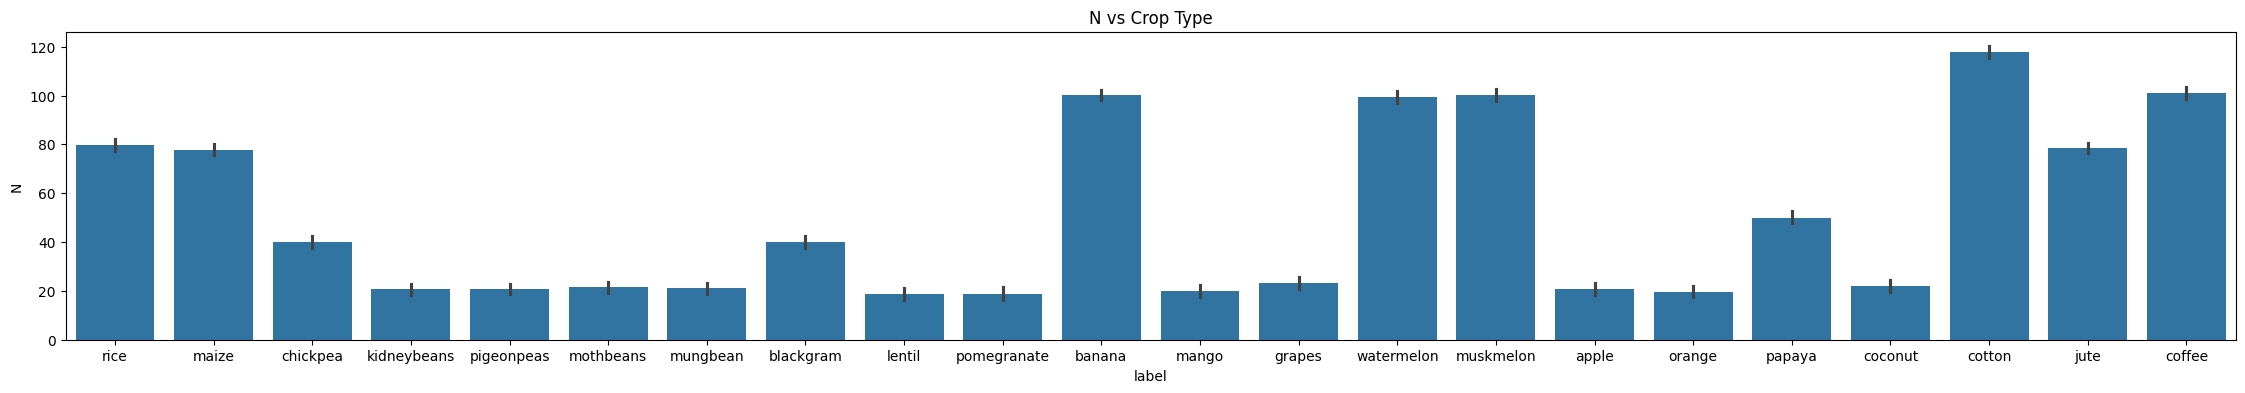

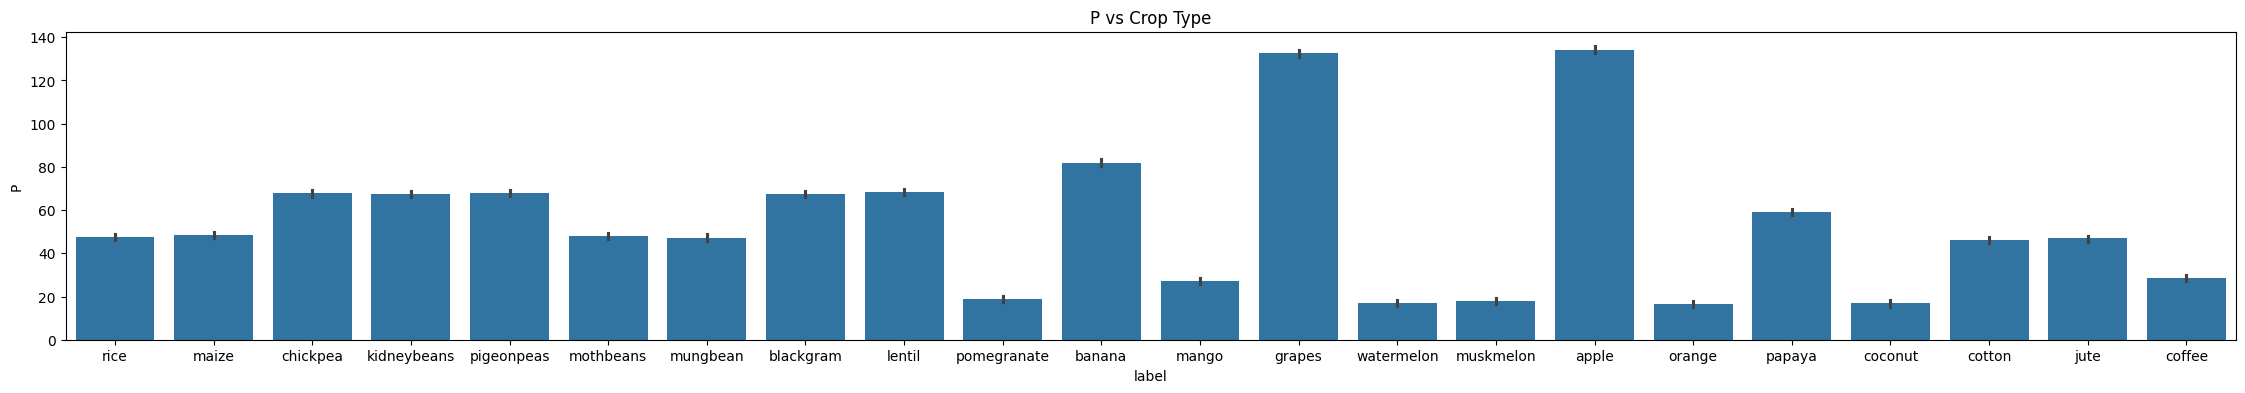

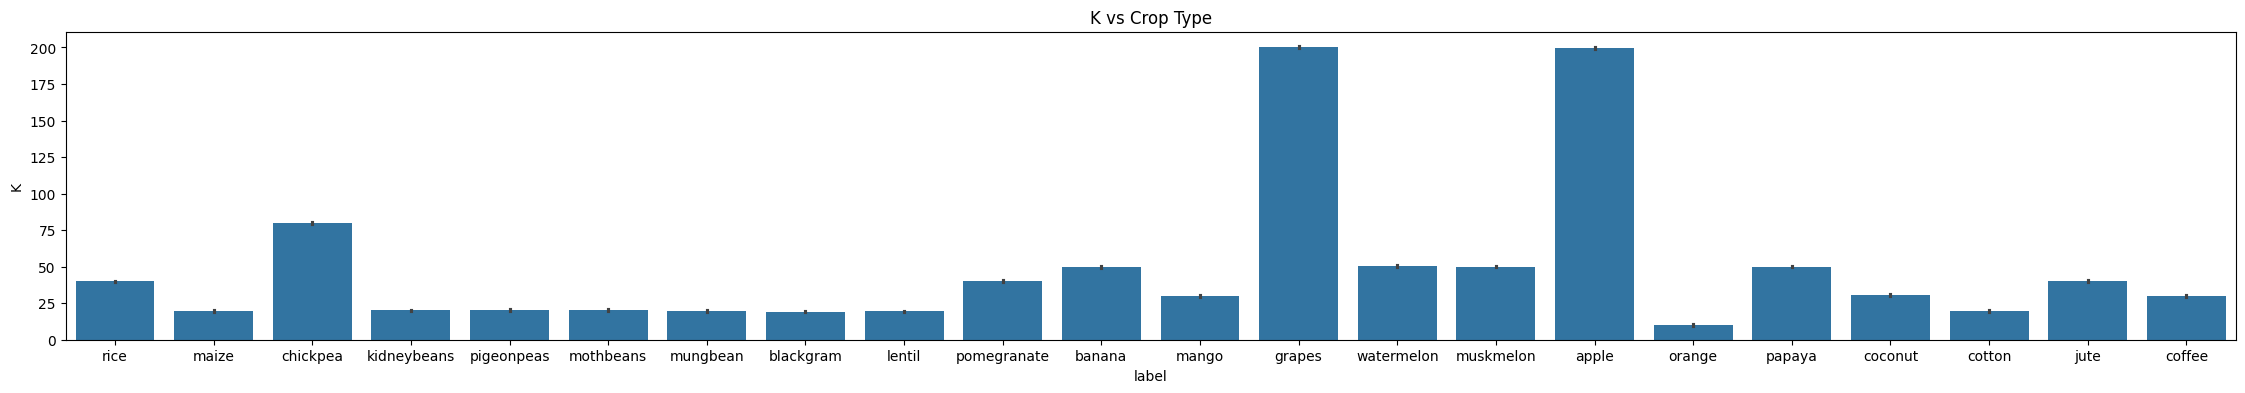

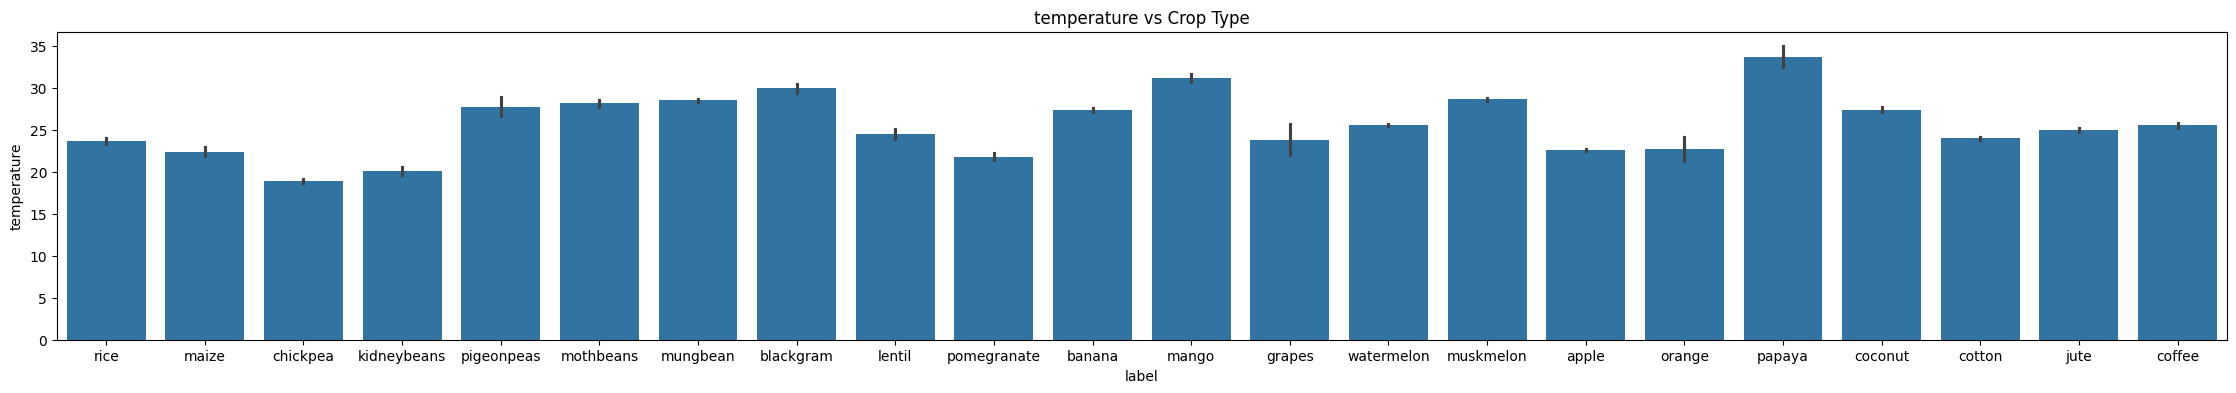

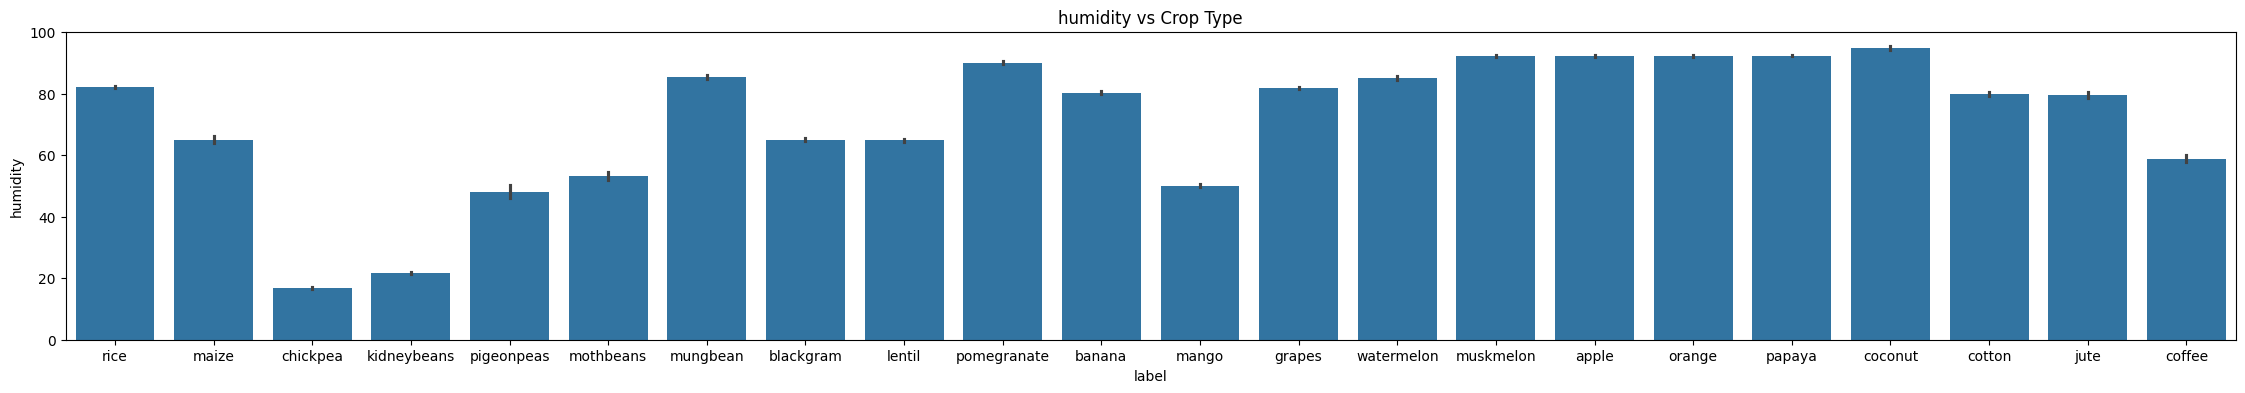

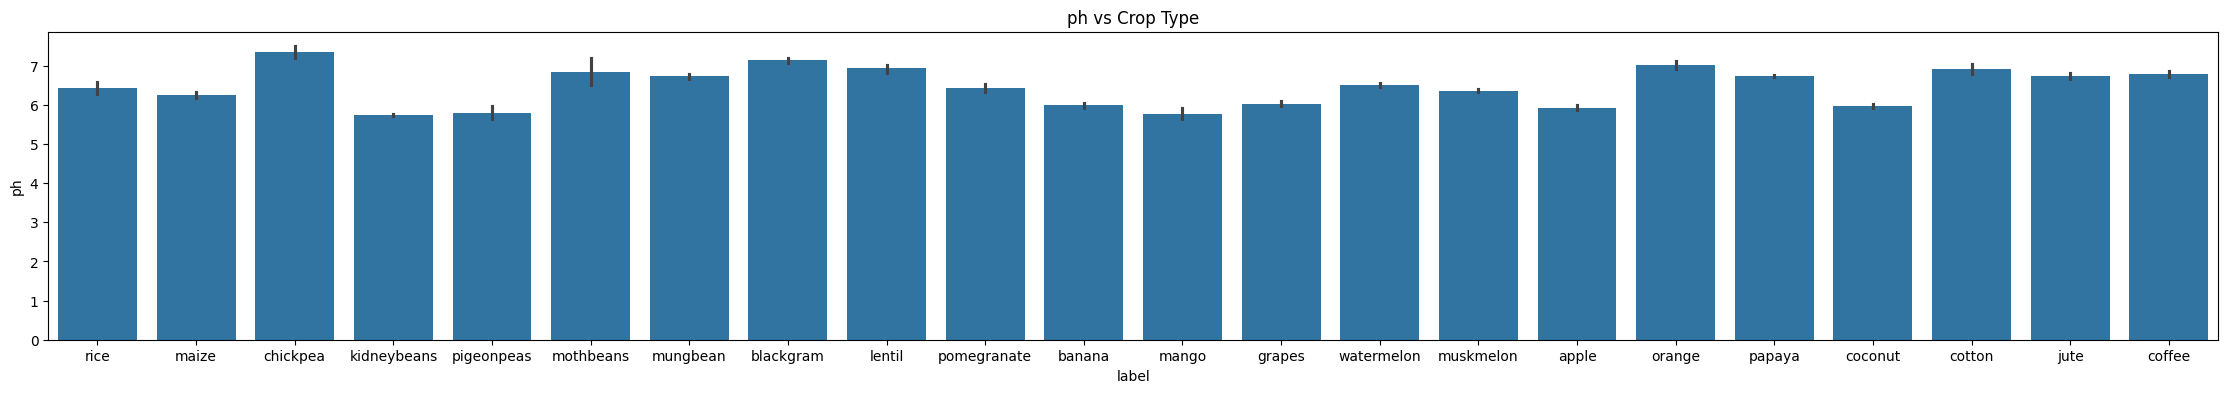

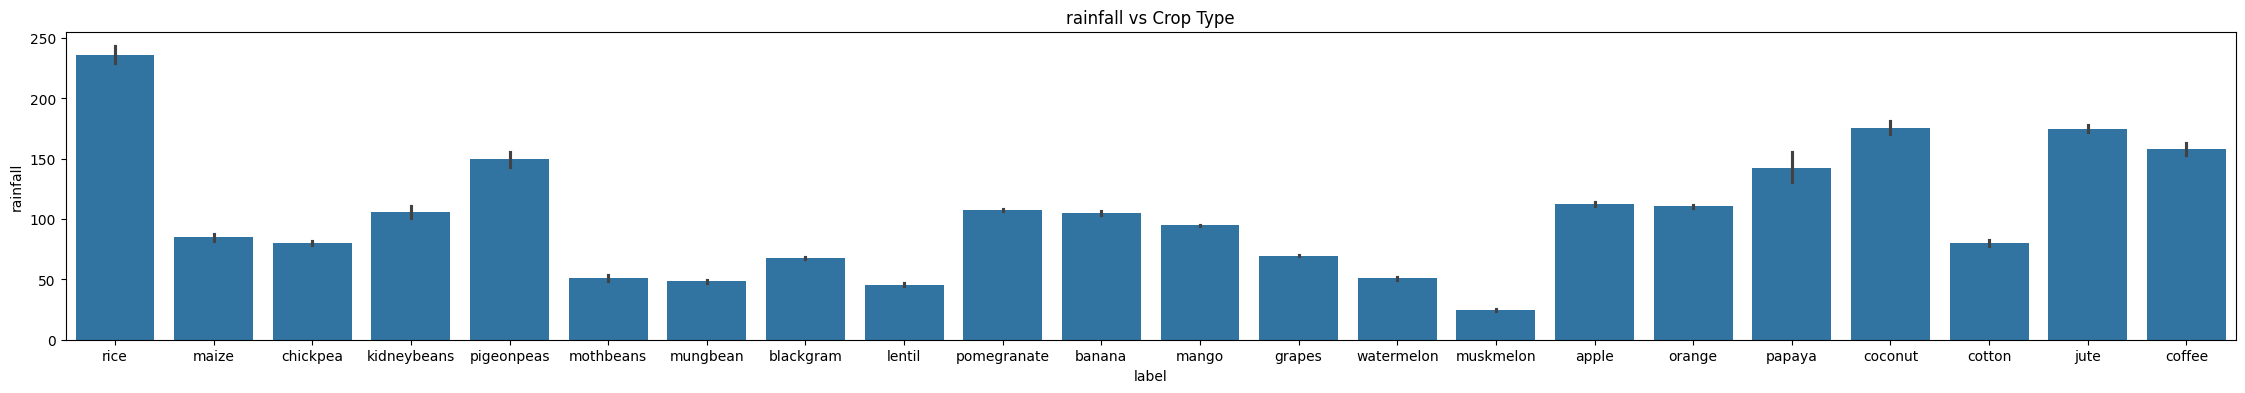

In [16]:
for col in columns:
  plt.figure(figsize=(28,4))
  sns.barplot(x="label",y=col, data=df)
  plt.title(f"{col} vs Crop Type")
  plt.show()

<ipython-input-17-05ddc7feff80>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, center=0)


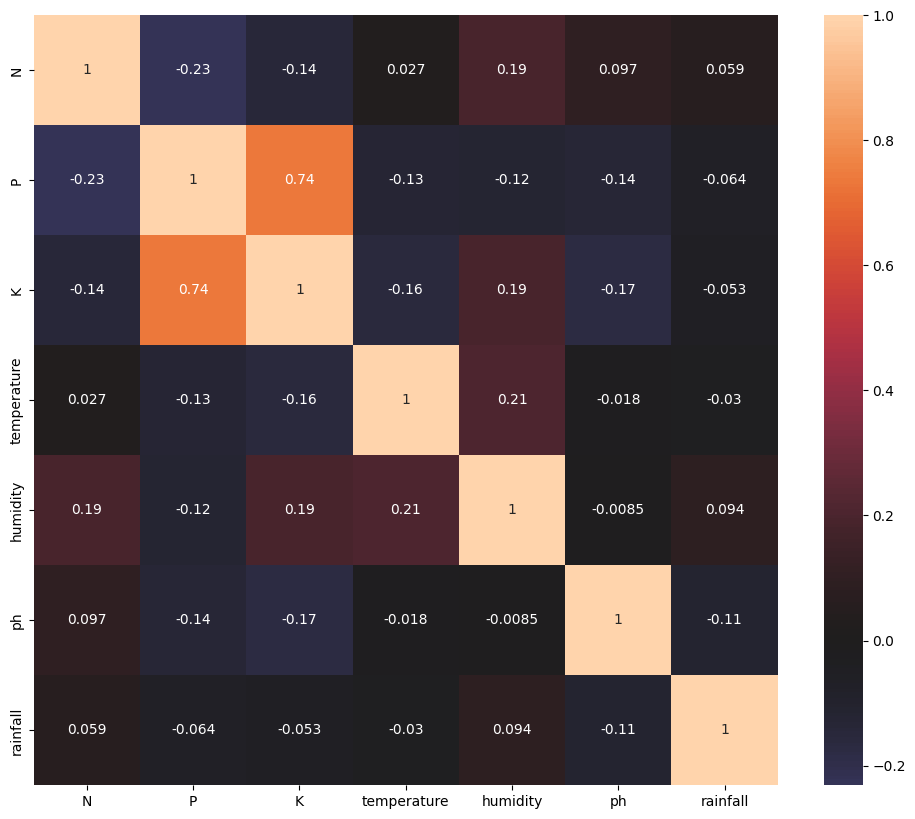

In [17]:
#heat map
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()

In [18]:
x = df['label'].value_counts().to_dict()

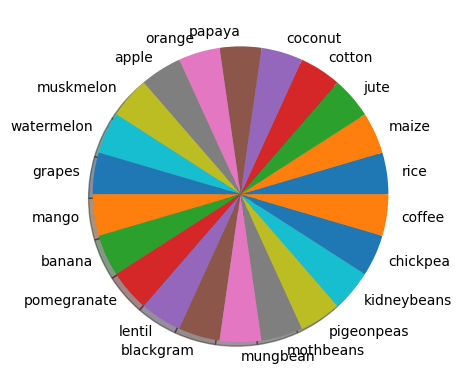

In [19]:
x_v = list(x.values())
x_k = list(x.keys())
plt.pie(x_v, labels=x_k, shadow=True)
plt.show()

In [21]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [23]:
labels = df['label'].unique()

In [24]:
labeled_data = {}
j=0
for i in labels:
  labeled_data[i] = j
  j+=1


In [25]:
print(labeled_data)

{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [26]:
label_values = list(labeled_data.values())

In [27]:

print(labels)
print("\n\n")
print(label_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [28]:
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [29]:
df['label_encoded'] = df.label.map(labeled_data)

In [30]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [31]:
X = df.drop(['label','label_encoded'],axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [32]:
y = df['label_encoded']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: label_encoded, dtype: int64

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)


In [35]:
sc = StandardScaler()

In [36]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [37]:
sc.mean_

array([ 50.39261364,  52.88238636,  47.23579545,  25.58610532,
        71.20236431,   6.46069391, 104.99553826])

In [38]:
np.sqrt(sc.var_)


array([36.6511325 , 32.50093228, 49.19601994,  5.08611542, 22.50626072,
        0.78173883, 55.66283749])

In [39]:
X_train.shape


(1760, 7)

In [40]:
#svm Classifier

from sklearn.svm import SVC
from sklearn import metrics
SVM = SVC(gamma=5)

SVM.fit(X_train,y_train)

SVC(gamma=5)

In [41]:
# Accuracy for training data
predicted_train_val = SVM.predict(X_train)
m1 = metrics.accuracy_score(y_train,predicted_train_val)
print('Traning Accuracy of SVM Model:',m1)

Traning Accuracy of SVM Model: 0.9994318181818181


In [42]:
# Testing accuracy
predicted_val = SVM.predict(X_test)
m2 = metrics.accuracy_score(y_test,predicted_val)
print('Testing Accuracy of SVM Model:',m2)

Testing Accuracy of SVM Model: 0.9454545454545454


In [45]:
m1=m1*100
m2=m2*100

print('training accuracy:',m1)
print('testing accuracy:',m2)


training accuracy: 99.94318181818181
testing accuracy: 94.54545454545455


In [ ]:
DECISION TREE

In [46]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", random_state=1,max_depth=5)
DT_model.fit(X_train,y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [47]:
# Training Accuracy
predicted_DT_train = DT_model.predict(X_train)
acc1 = metrics.accuracy_score(y_train,predicted_DT_train)
print('Training Accuracy of Desicion Tree Model:',acc1)

Training Accuracy of Desicion Tree Model: 0.9340909090909091


In [48]:
#Testing Accuracy
predicted_DT_test = DT_model.predict(X_test)
acc2 = metrics.accuracy_score(y_test,predicted_DT_test)
print('Testing Accuracy of Desicion Tree Model:',acc2)

Testing Accuracy of Desicion Tree Model: 0.9227272727272727


In [50]:
acc1=acc1*100
acc2= acc2*100

print('decision tree training accuracy',acc1)
print('deciison tree testing accuracy',acc2)

decision tree training accuracy 93.4090909090909
deciison tree testing accuracy 92.27272727272727


In [ ]:
RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=2, random_state=0)

RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [52]:
# Training Accuracy
predicted_RF_train = RF_model.predict(X_train)
b1 = metrics.accuracy_score(y_train,predicted_RF_train)
print('Training Accuracy of Random Forest Model:',b1)

Training Accuracy of Random Forest Model: 0.9823863636363637


In [53]:
#Testing Accuracy
predicted_RF_test = RF_model.predict(X_test)
b2 = metrics.accuracy_score(y_test,predicted_RF_test)
print("Testing Accuracy of Random Forest Model",b2)

Testing Accuracy of Random Forest Model 0.9590909090909091


In [54]:
b1=b1*100
b2=b2*100
print('random forest trainign accuracy',b1)
print('random forest testing accuracy',b2)

random forest trainign accuracy 98.23863636363637
random forest testing accuracy 95.9090909090909
